Finding donors for charity - KAGGLE
The aim here is to predict whether a household's income is superior or equal to 50k, meaning they are more likely to donate to charities

We start by loading the data and checking if it needs any cleaning. From there, we can identify the potentially useful variables, what we could look for and what are potential frictions to look out for.

In [125]:
#load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import cool
import matplotlib.style
import seaborn as sns
matplotlib.style.use('bmh')
train_data = pd.read_csv('C:/Users/abrie/OneDrive/Documents/PORTFOLIO - ARTHUR BRIENS/ML Charity Donors/census.csv')
df = train_data.copy()
dpi = 200

In [126]:
#First: A basic look into the data, some flaws might show themselves immediately.
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [127]:
#An easy way to check if data cleaning is necessary is to simply look at the amounts as well as the kind of values in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [128]:
#We see that there is no missing data, that does not mean that it does not need cleaning. 
#This is particularly true when it comes to numerical data.
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


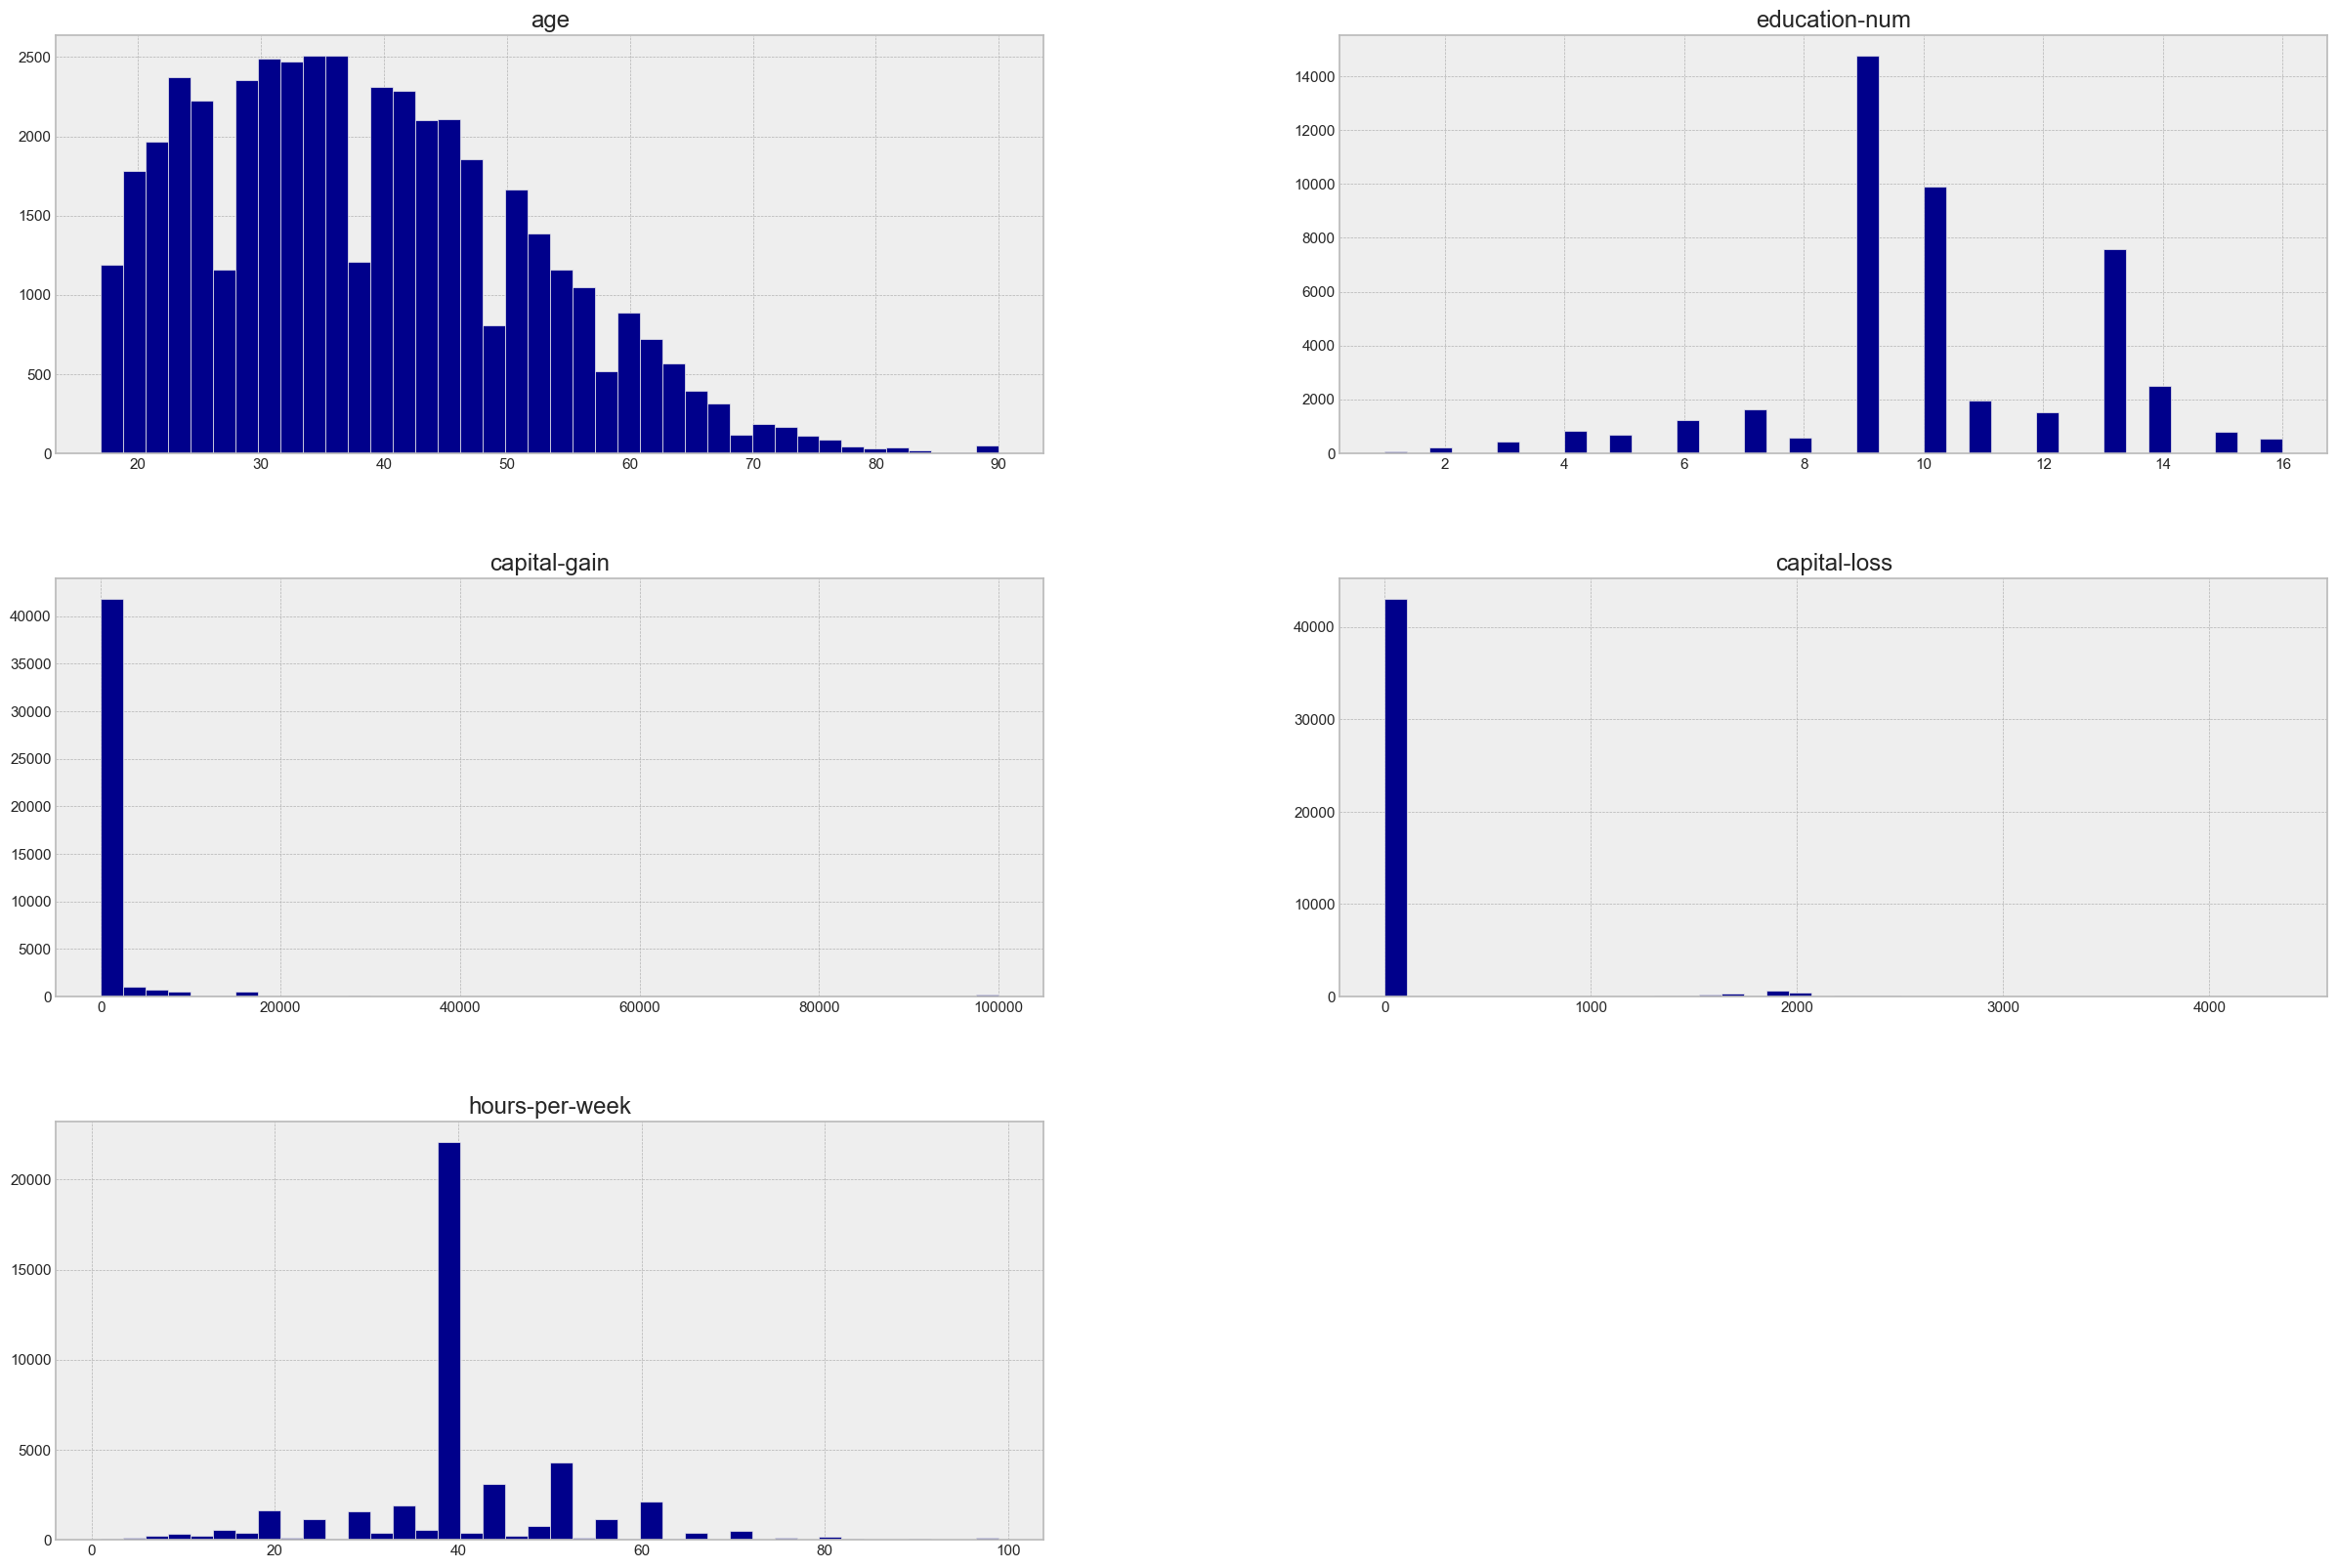

In [129]:
#Capital gain and capital loss seem a bit odd, it would seem that a crushing majority of values are of 0 with a few very high values. 
#Let's check if that's the case
%matplotlib inline
df.hist(bins=40, figsize=(30,20), color = 'darkblue')
plt.show()

In [130]:
donate = df.loc[df["income"] == '>50K']
not_donate = df.loc[df["income"] == '<=50K']
donate.head()


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K
10,37,Private,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.0,0.0,80.0,United-States,>50K
11,30,State-gov,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,India,>50K


It seems the data is all clean, there is no need for cleaning, at least for now. Capital gain and capital loss can very understandably be skewed around zero, as many people do not invest or hold any capital. We get a hint that owning capital could potentially be an indicator of wealth, and hence wether one is likely to donate to charity or not.

Now we move onto the data analysis, we aim to extract as much info from visualization and statistics.

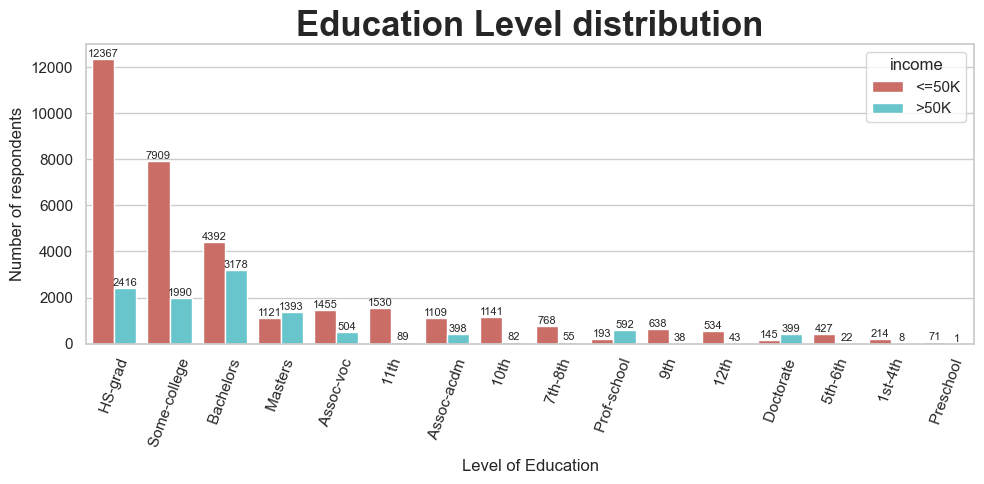

In [131]:
sns.set(style = 'whitegrid')
figsize = (10,5)
plt.figure(figsize = figsize, tight_layout = True)
ax = sns.countplot(x = df['education_level'], hue = df['income'], order = df['education_level'].value_counts().index, palette = 'hls')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=8)
ax.bar_label(ax.containers[1], label_type='edge', fontsize=8)
plt.title("Education Level distribution", fontsize=25, fontweight = 'bold')
plt.xlabel("Level of Education")
plt.ylabel("Number of respondents")
plt.tick_params(axis = 'x', rotation=70)
plt.show()

Now we will have a look at gender

In [132]:
df['sex'].value_counts()

 Male      30527
 Female    14695
Name: sex, dtype: int64

In [133]:
donate['sex'].value_counts()

 Male      9539
 Female    1669
Name: sex, dtype: int64

In [134]:
donate['workclass'].value_counts()

 Private             7251
 Self-emp-not-inc    1059
 Local-gov            915
 Self-emp-inc         912
 Federal-gov          549
 State-gov            520
 Without-pay            2
Name: workclass, dtype: int64

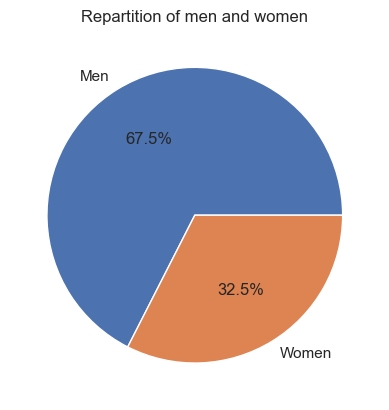

In [135]:
male_count = 30527
female_count = 14695
donating_men = 9539
donating_women = 1669
work_numbers = [7251, 1059, 915, 912, 549, 520, 2]
work_labels = ['Private','Self employment not inc','Local government','Self employed inc','Federal government','State government','Without pay']
gender_data = [male_count, female_count]
Labels = ['Men', 'Women']   

fig1, ax1 = plt.subplots()

ax1.pie(gender_data, labels = Labels, autopct='%1.1f%%')
plt.title('Repartition of men and women')
plt.show()


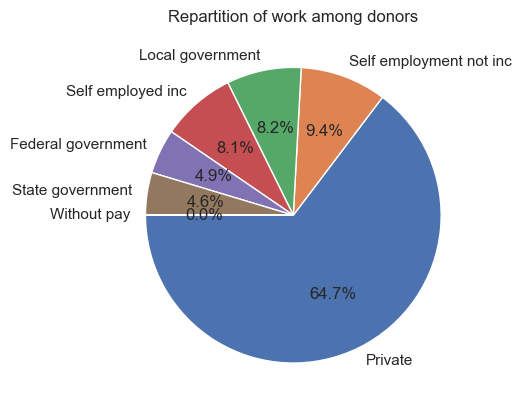

In [136]:
fig2, ax2 = plt.subplots()

ax2.pie(work_numbers, labels = work_labels, autopct='%1.1f%%', startangle=180)
plt.title('Repartition of work among donors')
plt.show()

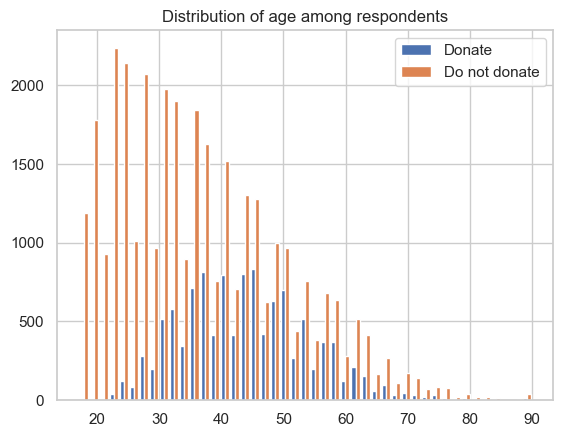

In [137]:
%matplotlib inline
plt.hist([donate['age'], not_donate['age']], bins = 45, label = ['Donate', 'Do not donate'])
plt.title("Distribution of age among respondents")
plt.legend(loc = 'upper right')
plt.show()

In [138]:
#Now we will create a new variable, an index of education level to hours worked per week, it will give us a better idea.
df['index'] = df['education-num']*df['hours-per-week']
df['index'] = df['index']/100
donate['index'] = donate['education-num']*donate['hours-per-week']
donate['index'] = donate['index']/100
print(df['index'])

0        5.20
1        1.69
2        3.60
3        2.80
4        5.20
         ... 
45217    5.20
45218    4.68
45219    6.50
45220    5.20
45221    7.80
Name: index, Length: 45222, dtype: float64


C:\Users\abrie\AppData\Local\Temp\ipykernel_136964\1409824157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donate['index'] = donate['education-num']*donate['hours-per-week']
C:\Users\abrie\AppData\Local\Temp\ipykernel_136964\1409824157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donate['index'] = donate['index']/100


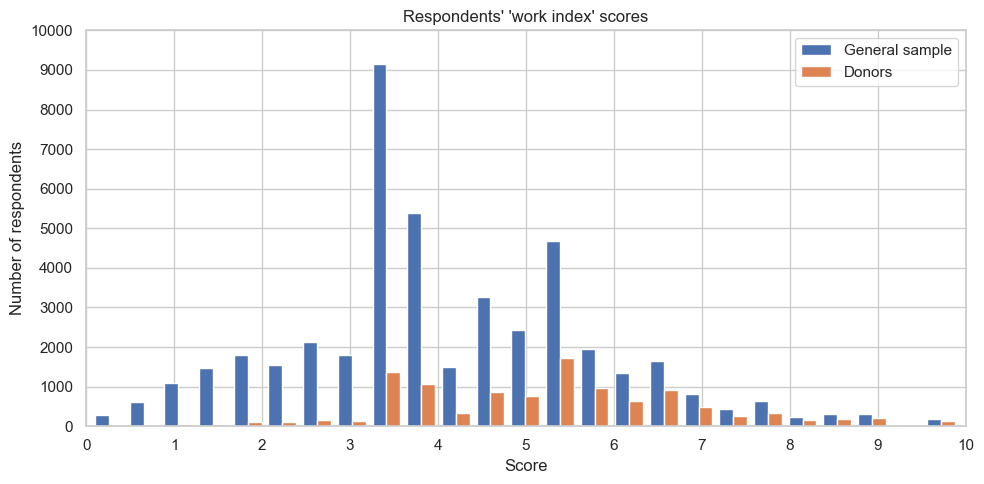

In [139]:
#seabass countplot
plt.figure(figsize = figsize, tight_layout = True)
plt.hist([df['index'], donate['index']], bins = 40, label = ['General sample', 'Donors'])
plt.title("Respondents' 'work index' scores")
plt.xlabel("Score")
plt.ylabel("Number of respondents")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])
plt.xlim(0, 10)
plt.legend(loc = 'upper right')
plt.show()